In [ ]:
'''
ML Lab 01

Prit Kanadiya
211070010

Aim: Implement data exploration using python libraries such as numpy and pandas

Theory: Data exploration refers to the initial step in data analysis in which data analysts use data visualization and statistical techniques to describe dataset characterizations, such as size, quantity, and accuracy, in order to better understand the nature of the data.

Data exploration techniques include both manual analysis and automated data exploration software solutions that visually explore and identify relationships between different data variables, the structure of the dataset, the presence of outliers, and the distribution of data values in order to reveal patterns and points of interest, enabling data analysts to gain greater insight into the raw data.
'''

In [30]:
# Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy import stats
import warnings

from pandas.plotting import parallel_coordinates, andrews_curves, radviz, scatter_matrix

In [ ]:
# Loading the iris dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
iris = pd.read_csv(url)

In [ ]:
# Head prints the first 5 entries of csv
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Tail prints the last 5 entries of csv
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
# Print the shape of the iris dataset.
iris.shape

(150, 5)

In [ ]:
# Gives information about the structure of dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Gives details about distribution of data
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Counts the number of null values, This is used to check if cleaning is required
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [45]:
# Counts the unique categories present
data = iris.drop_duplicates(subset ="species",)
print(data)
print("Total number of unique species: " + str(len(data)))

     sepal_length  sepal_width  petal_length  petal_width     species
0             5.1          3.5           1.4          0.2      setosa
50            7.0          3.2           4.7          1.4  versicolor
100           6.3          3.3           6.0          2.5   virginica
Total number of unique species: 3


In [46]:
# This is similar to describe, but here we explicitly give the required metrics
metrics = ['count', 'min', 'max', 'mean','std','skew']
iris.groupby(by='species').agg(metrics)

sepal_length                                      sepal_width       \
                  count  min  max   mean       std      skew       count  min   
species                                                                         
setosa               50  4.3  5.8  5.006  0.352490  0.120087          50  2.3   
versicolor           50  4.9  7.0  5.936  0.516171  0.105378          50  2.0   
virginica            50  4.9  7.9  6.588  0.635880  0.118015          50  2.2   

                        ... petal_length                             \
            max   mean  ...          max   mean       std      skew   
species                 ...                                           
setosa      4.4  3.428  ...          1.9  1.462  0.173664  0.106394   
versicolor  3.4  2.770  ...          5.1  4.260  0.469911 -0.606508   
virginica   3.8  2.974  ...          6.9  5.552  0.551895  0.549445   

           petal_width                                       
                 count  min  max   mean       std      skew  
species                                                      
setosa              50  0.1  0.6  0.246  0.105386  1.253861  
versicolor          50  1.0  1.8  1.326  0.197753 -0.031180  
virginica           50  1.4  2.5  2.026  0.274650 -0.129477  

[3 rows x 24 columns]

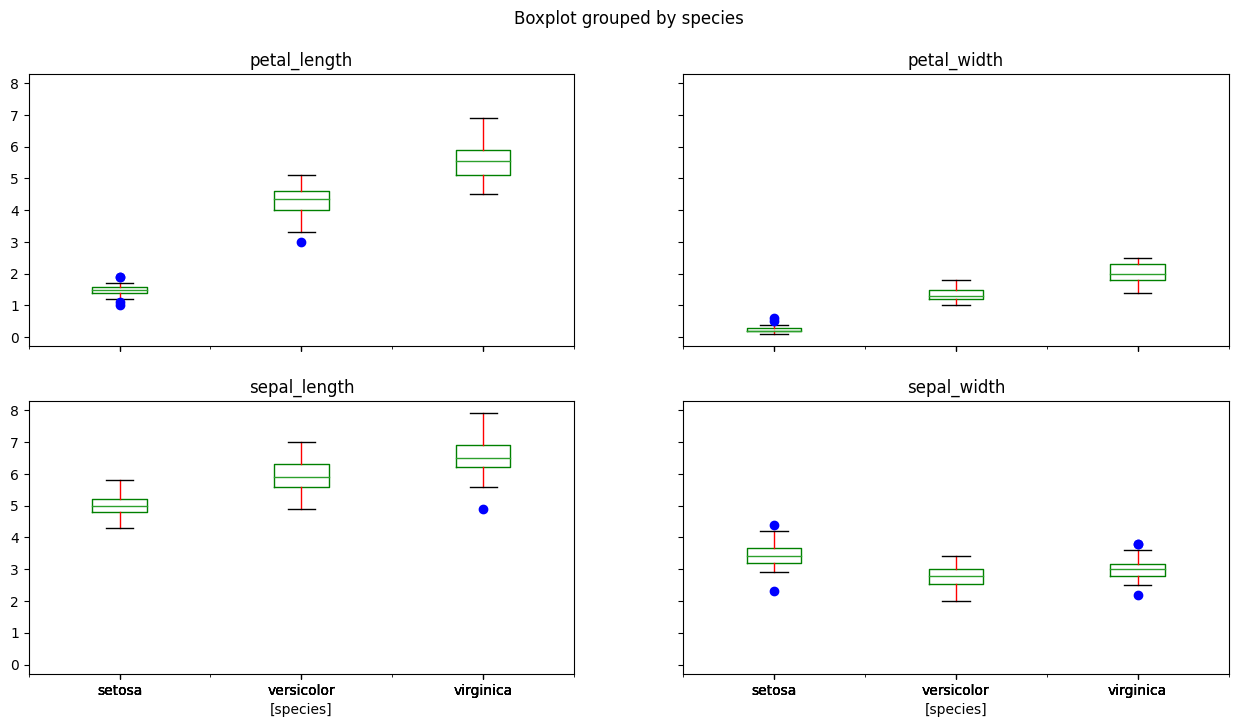

In [47]:
# The box represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3).
# The height of the box corresponds to the spread of the middle 50% of the data.
# The blue points are outliers in data

iris.boxplot(by='species', figsize=(15, 8),color={'boxes':'Green','whiskers':'Red'},sym='bo', grid=False)
plt.show()

<ipython-input-32-f0b9d7cb170b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris[col],fit=stats.expon,hist=True,kde=True,ax=ax1)


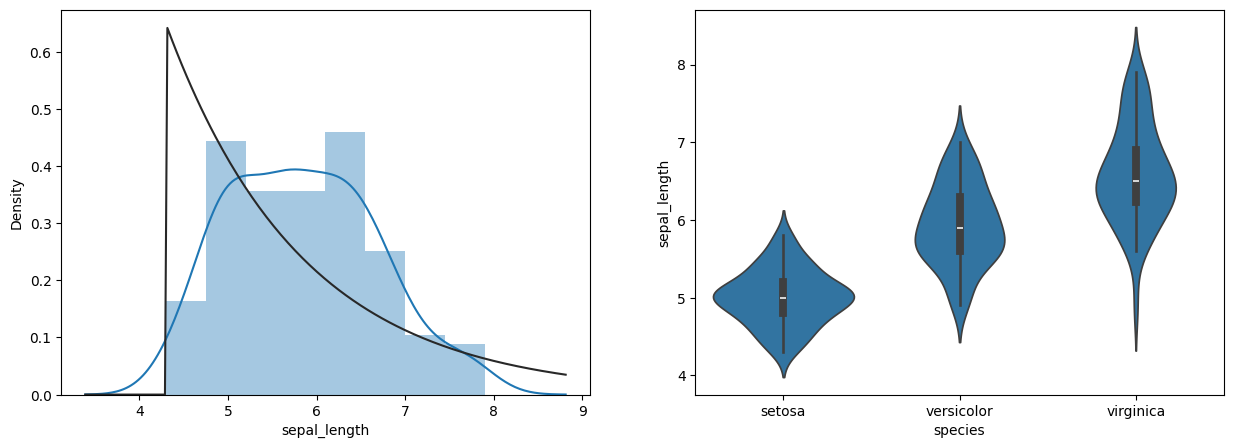

<ipython-input-32-f0b9d7cb170b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris[col],fit=stats.expon,hist=True,kde=True,ax=ax1)


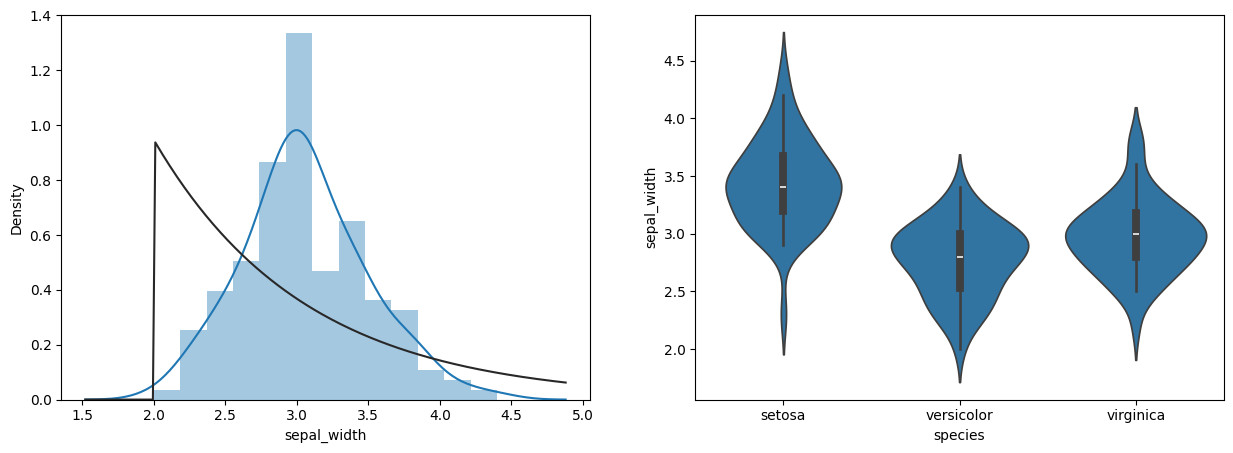

<ipython-input-32-f0b9d7cb170b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris[col],fit=stats.expon,hist=True,kde=True,ax=ax1)


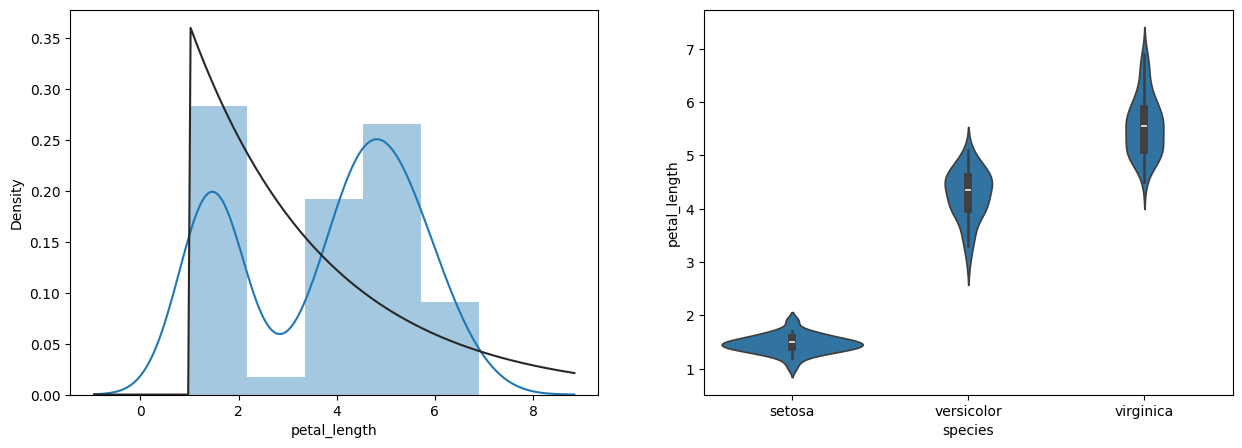

<ipython-input-32-f0b9d7cb170b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris[col],fit=stats.expon,hist=True,kde=True,ax=ax1)


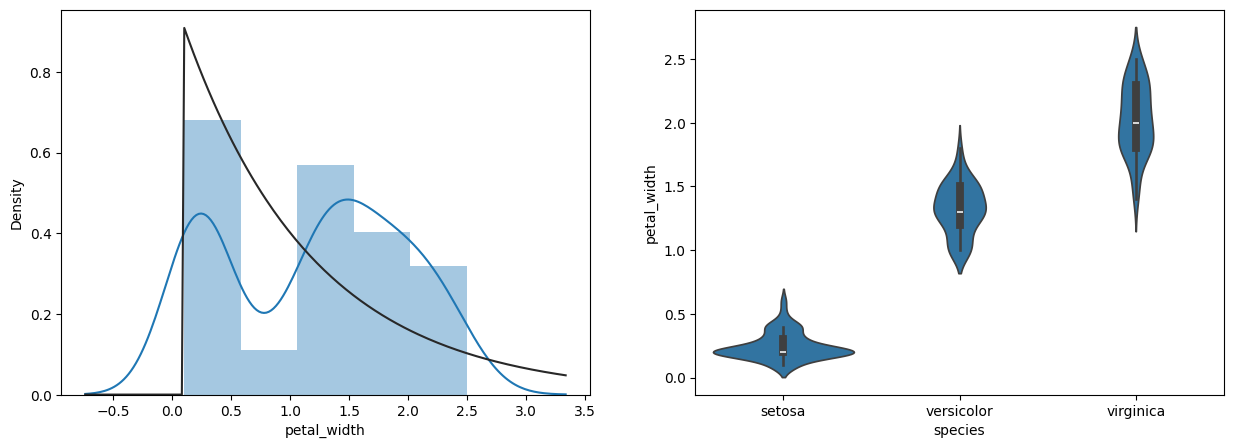

In [32]:
# The code iterates over numerical features in the Iris dataset, visualizing their overall distribution with a histogram, kde plot, and fitted exponential distribution on one subplot. Simultaneously, it shows the distribution of each feature within each species category (Setosa, Versicolor, Virginica) using violin plots and inner box plots on another subplot. This provides a comprehensive view of both individual feature distributions and how they vary across species.
feats = iris.drop(columns=['species'])
for col in feats.columns:
  fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,5), sharex=False)
  sns.distplot(iris[col],fit=stats.expon,hist=True,kde=True,ax=ax1)
  sns.violinplot(data=iris,x='species',y=col,inner='box',ax=ax2)
  plt.show()

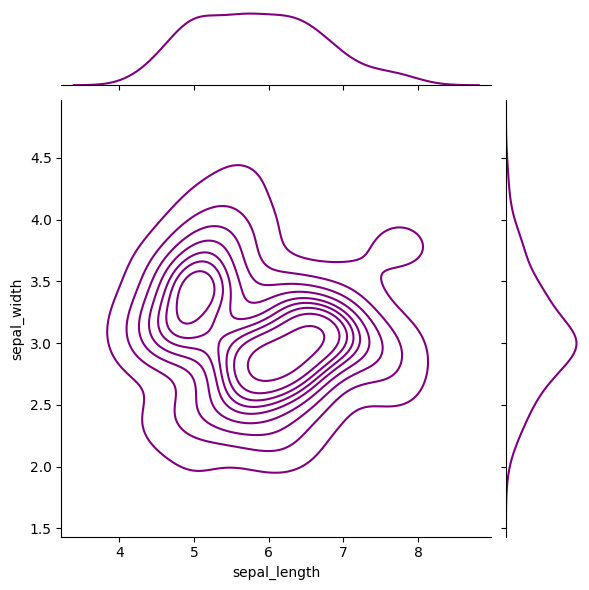

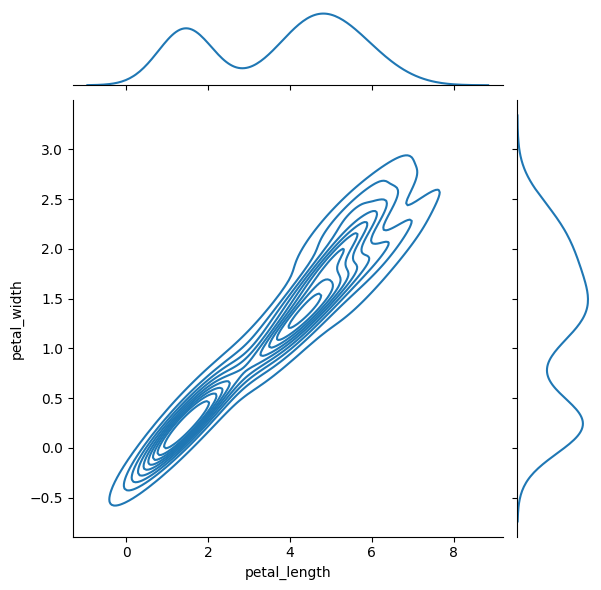

In [28]:
# This code generates two "kde" visualizations, each exploring the relationship between features in the Iris dataset. The first analyzes sepal length versus sepal width using a purple density plot, while the second examines petal length and petal width with the default color scheme. Both are saved to "kde.png" and displayed temporarily. This allows you to visually compare feature distributions and potential correlations within the dataset.
sns.jointplot(data=iris,x='sepal_length',y='sepal_width',kind='kde',color="Purple")
sns.jointplot(data=iris,x='petal_length',y='petal_width',kind='kde')
plt.savefig("kde.png")
plt.show()

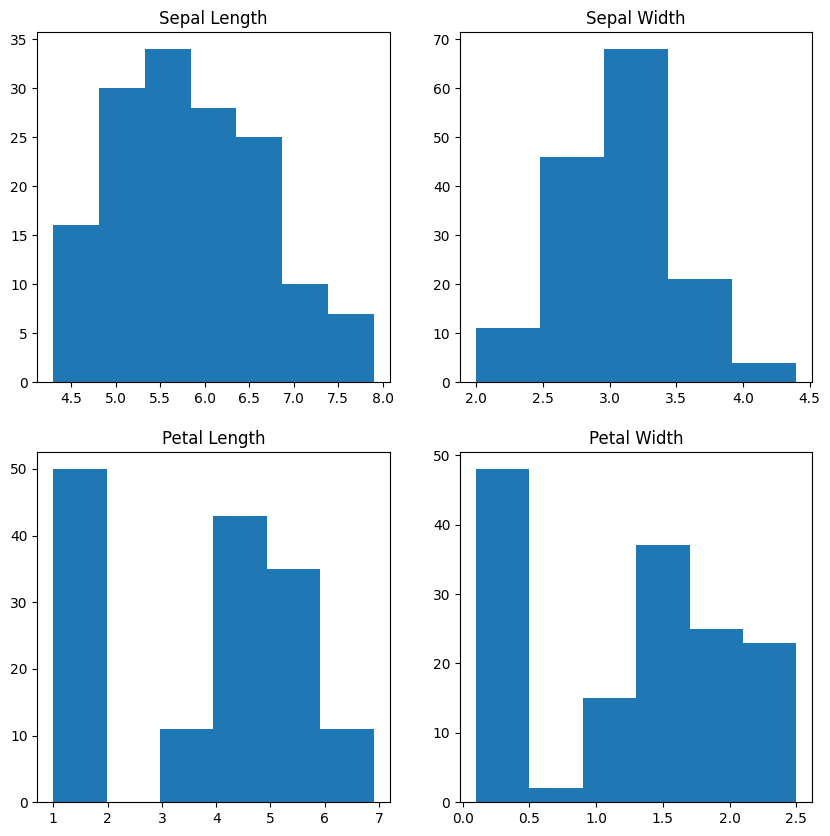

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(iris['sepal_length'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(iris['sepal_width'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(iris['petal_length'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(iris['petal_width'], bins=6);

<ipython-input-39-523836c7d9a6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(method='pearson'))


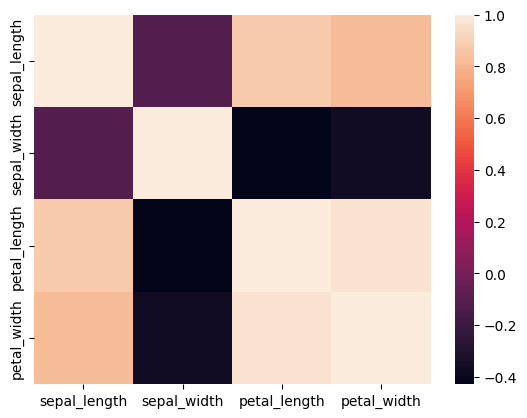

In [39]:
# Generating a corellation matrix or heatmap
sns.heatmap(iris.corr(method='pearson'))
plt.show()

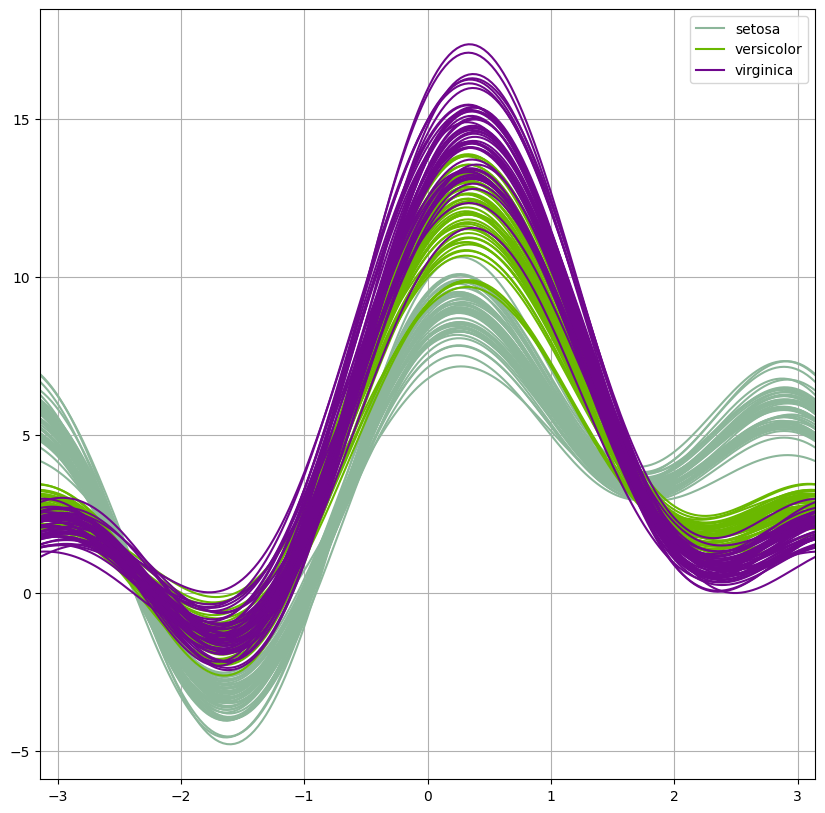

In [40]:
# Plotting the iris dataset using Andrews Curves
plt.figure(figsize=(10, 10))
andrews_curves(iris, 'species')
plt.savefig("andrew_curve.png")
plt.show()

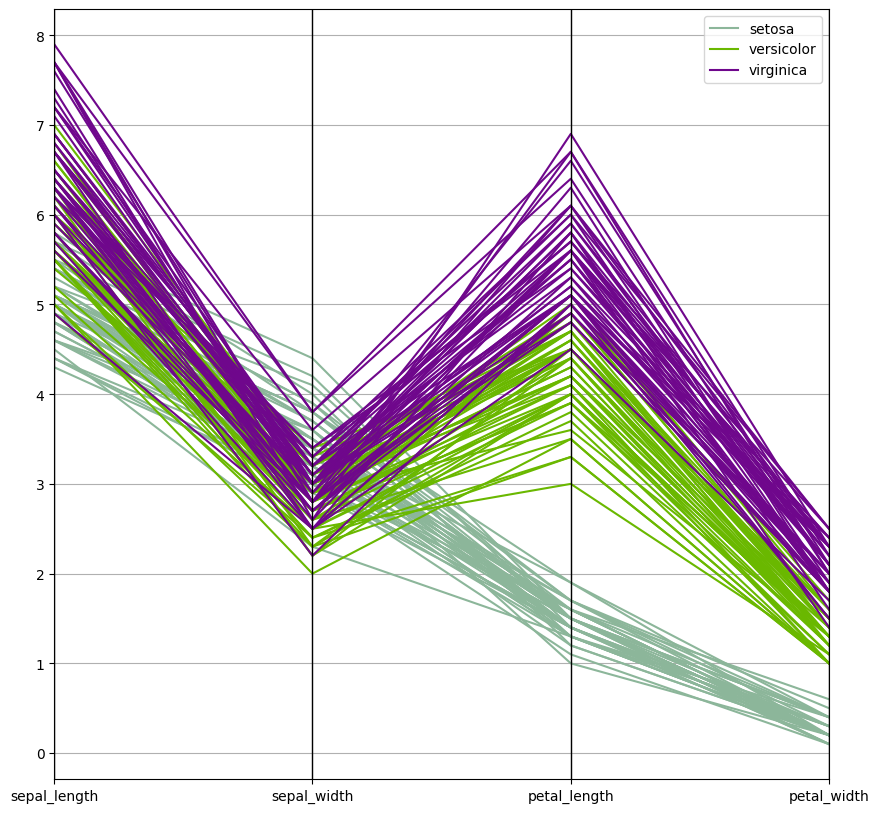

In [41]:
# Plotting the Iris Dataset using parallel coordinates
plt.figure(figsize=(10, 10))
parallel_coordinates(iris, 'species')
plt.show()

In [42]:
'''
Conclusion: Hence understood and implemented data exploration and visualization in python using the iris daatset.
'''